Training Set Shape: (5634, 20), Test Set Shape: (1409, 20)

Baseline Model Accuracy: 0.7892

Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86      1035
         1.0       0.63      0.51      0.56       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



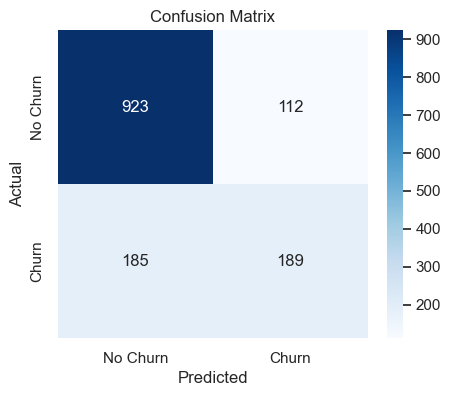


Cross-Validation Accuracy: 0.8040 ± 0.0106

Baseline Model Saved Successfully! ✅


In [1]:
# 📌 Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import joblib  # To save the model

# Set visualization style
sns.set(style="whitegrid")

# 📌 Step 2: Load Preprocessed Data
X_train = pd.read_csv("../data/processed/X_train.csv")
X_test = pd.read_csv("../data/processed/X_test.csv")
y_train = pd.read_csv("../data/processed/y_train.csv").values.ravel()
y_test = pd.read_csv("../data/processed/y_test.csv").values.ravel()

print(f"Training Set Shape: {X_train.shape}, Test Set Shape: {X_test.shape}")

# 📌 Step 3: Train a Baseline Logistic Regression Model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# 📌 Step 4: Model Evaluation on Test Set
y_pred = model.predict(X_test)

# Compute accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
print(f"\nBaseline Model Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 📌 Step 5: Confusion Matrix Visualization
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 📌 Step 6: Perform Cross-Validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
print(f"\nCross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# 📌 Step 7: Save the Model
joblib.dump(model, "../models/baseline_model.pkl")
print("\nBaseline Model Saved Successfully! ✅")
